In [68]:
from typing import BinaryIO, List, Tuple, Union
from joblib import load, dump
import os
from glob import iglob
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from modeling import MultiModel

In [41]:
%reload_ext autoreload
%autoreload 1 
%aimport modeling 

In [48]:
run "../graph_tool.py"

In [26]:
final_models = [
        {
            "y_variable": "Cooler_Condition",
            "feature_set": "dx_3rds",
            "model_ids": ["knn_grid_search", "xgb_grid_search"]
            },
        {
            "y_variable": "Hydraulic_accumulator_bar",
            "feature_set": "avg_3rds",
            "model_ids": ["knn_grid_search", "xgb_grid_search"]
            },
        {
            "y_variable": "Internal_pump_leakage",
            "feature_set": "avg_3rds",
            "model_ids": ["knn_grid_search", "xgb_grid_search"]
            },
        {
            "y_variable": "stable_flag",
            "feature_set": "avg_3rds",
            "model_ids": ["knn_grid_search", "xgb_grid_search"]
            },
        {
            "y_variable": "Valve_Condition",
            "feature_set": "avg_3rds",
            "model_ids": ["knn_grid_search", "xgb_grid_search"]
            }
        ]

In [45]:
model = load("../models/Valve_Condition_avg_3rds.pkl")

TypeError: 'GridSearchCV' object is not subscriptable

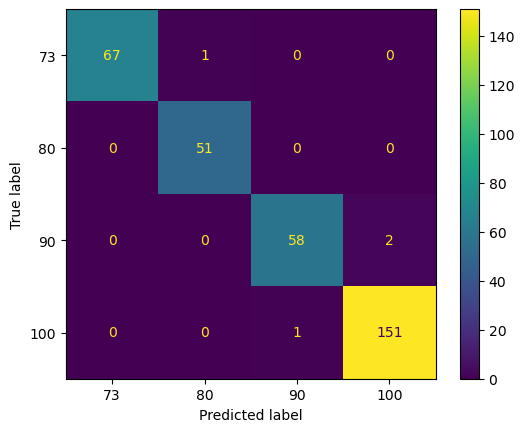

In [23]:
y_pred = model.grids[5].predict(model.model_X_test)
y_test = model.model_y_test
plot_confusion_matrix(model.grids[5], model.model_X_test, model.model_y_test)
plt.show()

In [121]:
def top_confusion(filename:Union[BinaryIO, str], model_i:Tuple, ax_row):
    """plots a confusion matrix for the model file passed in"""
    
    model = load(filename)
    model_names = ["KNN", "XGBoost"]
    for index in range(2):
        plot_confusion_matrix(model.grids[model_i[index]], model.model_X_test, model.model_y_test, ax=ax_row[index], cmap='gnuplot')
        ax_row[index].set_title(model_names[index])
    return plt.show()

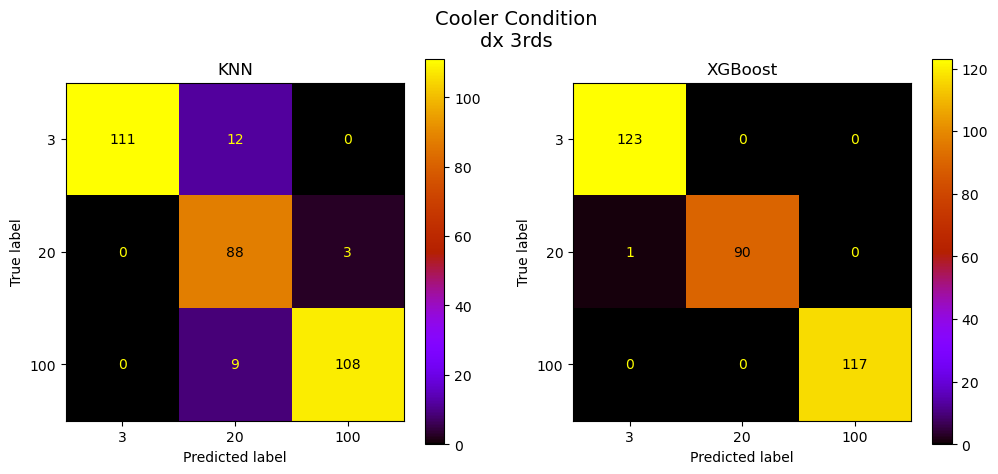

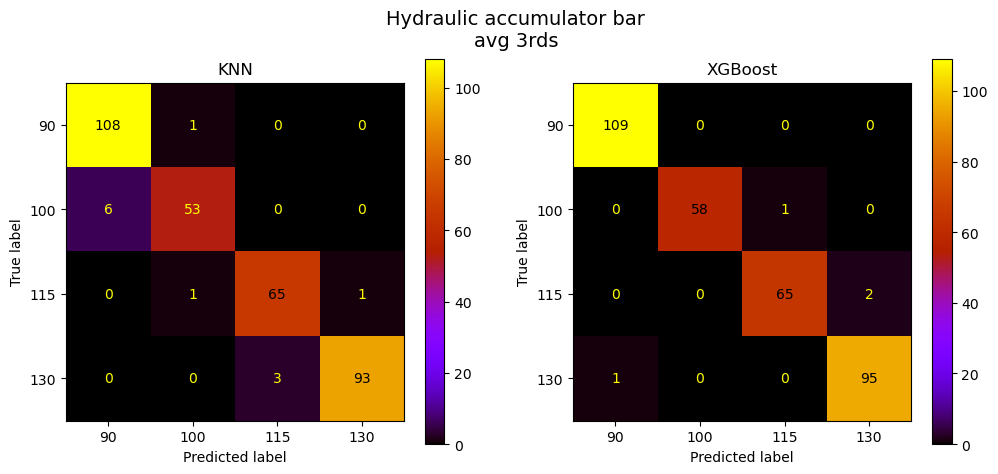

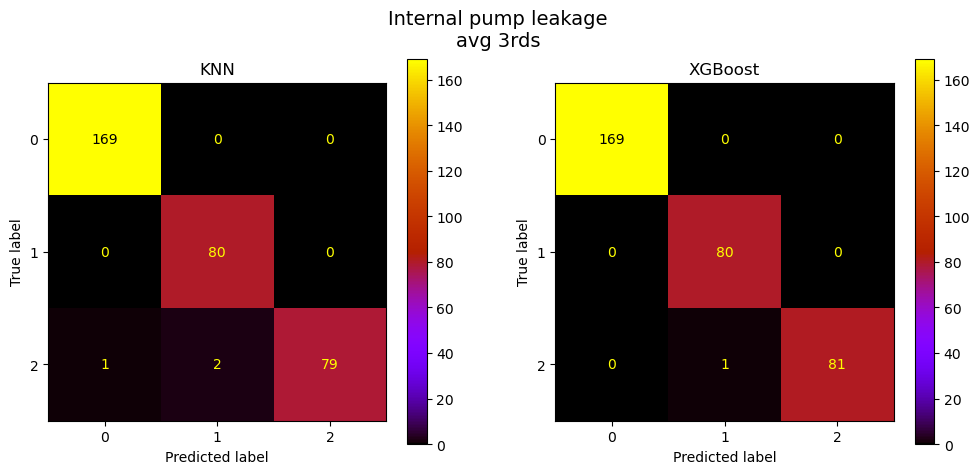

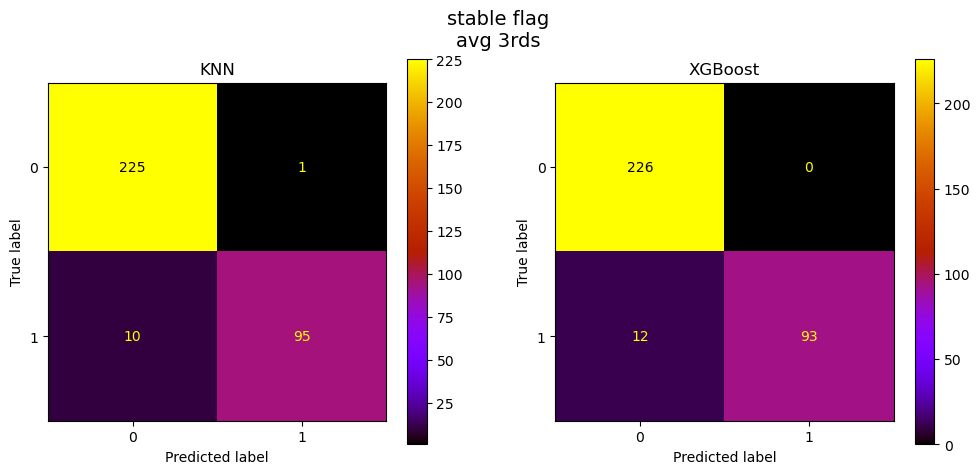

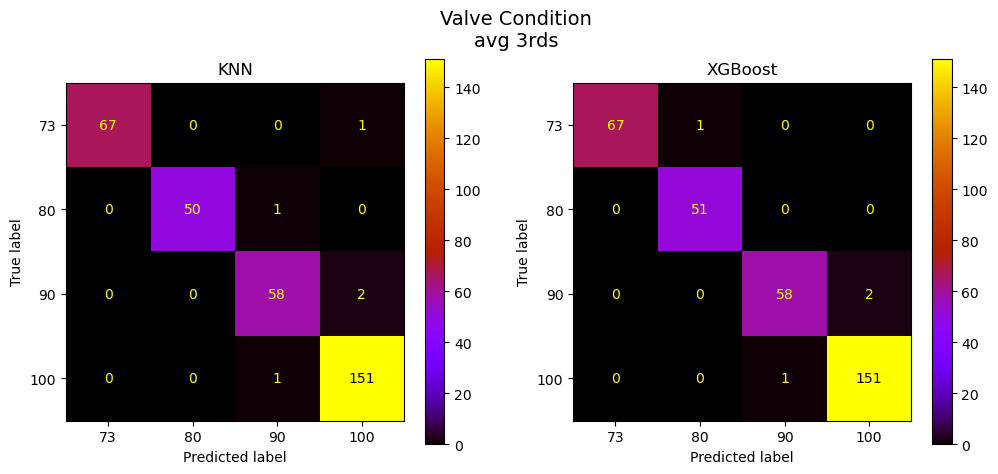

In [122]:
filenames = [f"{model['y_variable']}_{model['feature_set']}.pkl" for model in final_models]
ax_num = (divmod(num, 2) for num in range(10))
for model_file in iglob("../models/*.pkl"):
    basename = os.path.basename(model_file)
    if basename in filenames:
        title = " ".join(basename[:-4].split("_")[:-2])
        subtitle = " ".join(basename[:-4].split("_")[-2:]) 
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))
        fig.suptitle(f"{title}\n{subtitle}", fontsize=14)
        row = (ax[0], ax[1])
        top_confusion(model_file, (3, 5), row)